In [8]:
import numpy as np
import pandas as pd

In [18]:
# We specifuy an index column to pandas so it won't get in our way during computations
weekly_sales = pd.read_csv("resources/butter-nut-sales.csv", index_col="day")
weekly_sales

,almod,peanut,cashew
day,,,
mon,2,7,1
tues,9,4,16
wed,11,14,18
thurs,13,13,16
fri,15,18,9


In [24]:
# We can use matrix multiplciation to compute the total value for each day
prices = np.array([8, 12, 18])
totals = weekly_sales.values @ prices
totals

array([118, 408, 580, 548, 498])

In [25]:
# them we can input it in our dataframe
weekly_sales["total"] = totals
weekly_sales

,almod,peanut,cashew,total
day,,,,
mon,2,7,1,118
tues,9,4,16,408
wed,11,14,18,580
thurs,13,13,16,548
fri,15,18,9,498


In [30]:
# We can also use compuited columns from pandas
# Here we drop the totals that is already in the DF to make the matrices shapes compatible
weekly_sales["total"] = np.dot(weekly_sales.drop("total", axis=1).values, prices)
weekly_sales

,almod,peanut,cashew,total
day,,,,
mon,2,7,1,118
tues,9,4,16,408
wed,11,14,18,580
thurs,13,13,16,548
fri,15,18,9,498


In [31]:
# Of course, we can take a look at the mean, variance and std of the total sales
weekly_sales["total"].describe()

count      5.000000
mean     430.400000
std      186.329815
min      118.000000
25%      408.000000
50%      498.000000
75%      548.000000
max      580.000000
Name: total, dtype: float64

(array([1., 0., 0., 0., 0., 0., 1., 0., 1., 2.]),
 array([118. , 164.2, 210.4, 256.6, 302.8, 349. , 395.2, 441.4, 487.6,
        533.8, 580. ]),
 <BarContainer object of 10 artists>)

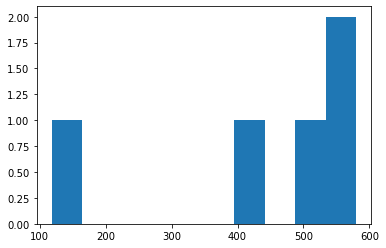

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(weekly_sales["total"])